<a href="https://colab.research.google.com/github/aregeezra/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0.0 IMPORT

In [ ]:
import pandas                as pd
import numpy                 as np
import matplotlib.pyplot     as plt
import seaborn               as sns
import matplotlib.image      as mpimg

from IPython.core.display    import HTML
from IPython.display         import Image
from tabulate                import tabulate

from scipy.stats             import chi2_contingency
from sklearn.metrics         import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.metrics         import mean_squared_error
from sklearn.preprocessing   import StandardScaler
from sklearn.ensemble        import RandomForestClassifier
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import accuracy_score


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import warnings
warnings.filterwarnings("ignore")

## 0.1 Helper Function

In [ ]:
def colab_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

# Plotting Stacked Bars
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):

  """
  Plot stacked bars with annotations
  """
  ax = dataframe.plot(kind="bar",
                    stacked=True,
                    figsize=size_,
                    rot=rot_,
                    title=title_)
  # Annotate bars
  annotate_stacked_bars(ax, textsize=14)
  # Rename legend
  plt.legend(["Not Survived", "Survived"], loc=legend_)
  # Labels
  plt.ylabel("Survived base (%)")
  plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
  """
  Add value annotations to the bars
  """
  # Iterate over the plotted rectanges/bars
  for p in ax.patches:
    # Calculate annotation
    value = str(round(p.get_height(),1))
    # If value is 0 do not annotate
    if value == '0.0':
     continue
    ax.annotate(value,
                ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
                color=colour,
                size=textsize,)

  


In [ ]:
colab_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2 Loading Data

In [ ]:
train = pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')
test = pd.read_csv('https://archive.org/download/test1_202002/test%20%281%29.csv')

In [ ]:
# first five rows

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# last five rows
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 1.0 Data Description

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 1.2 Data Dimensions

In [ ]:

print(f'Number of Rows in Training data: {train.shape[0]}\nNumber of Columns in Training Data: {train.shape[1]}\n' )

print(f'Number of Rows in Test data: {test.shape[0]}\nNumber of Columns in Test Data: {test.shape[1]}\n' )

Number of Rows in Training data: 891
Number of Columns in Training Data: 12

Number of Rows in Test data: 418
Number of Columns in Test Data: 11



##1.3 Data Types

In [ ]:
# Evidence of null values in our dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
 # Evidence of null values in our dataset
 test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


##1.4 Check NA

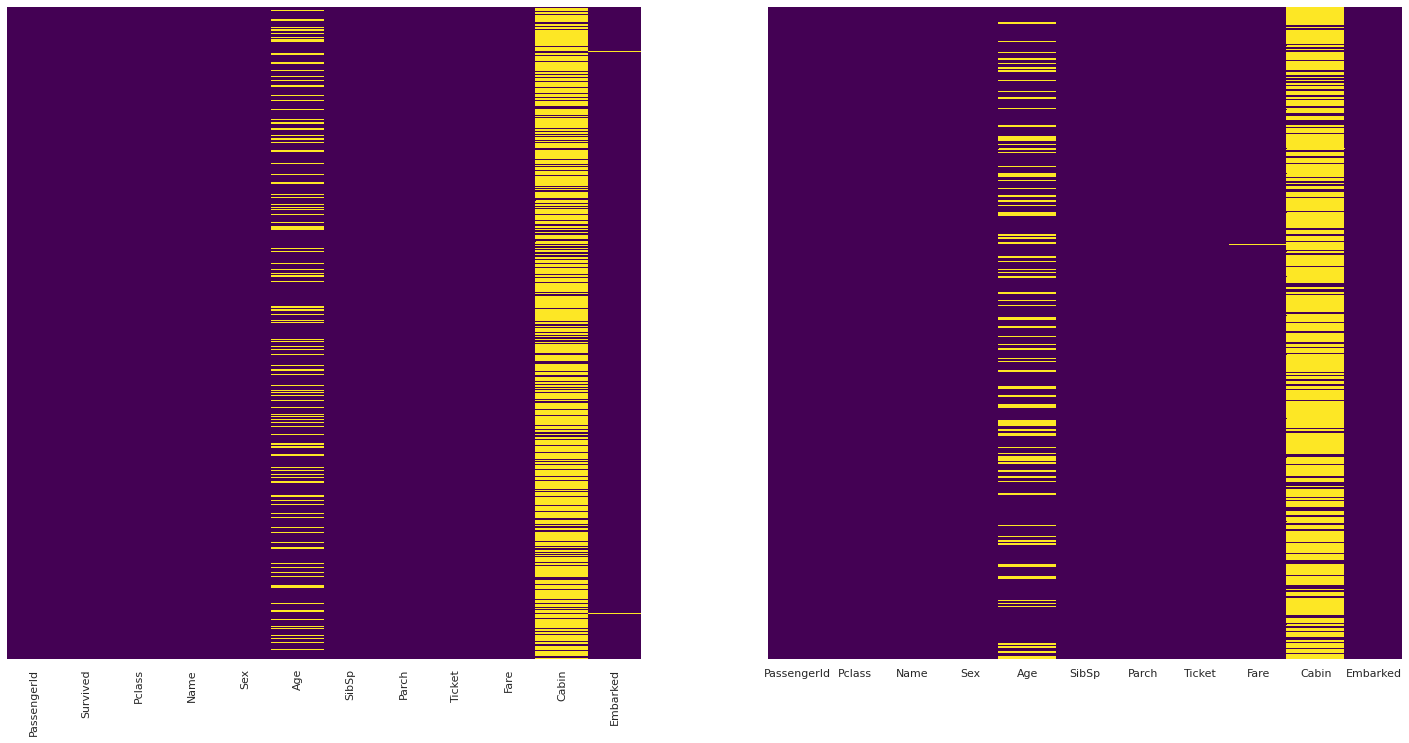

In [ ]:
plt.subplot(1,2,1)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

plt.subplot(1,2,2)
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#Missing Values in Percentage
pd.DataFrame({"Missing Values(%)":
              train.isna().sum()/len(train.index)*100})

,Missing Values(%)
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [ ]:
pd.DataFrame({"Missing Values(%)":
              test.isna().sum()/len(test.index)*100})

,Missing Values(%)
PassengerId,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.574163
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.239234
Cabin,78.229665


## 1.5 Fillout NA

In [ ]:
traincolumns = ['Embarked', 'Parch', 'SibSp', 'Sex', 'Pclass']

In [ ]:
#Unique values in each column

for col in traincolumns:
  print(f'Unique values in {col}  \n {train[col].unique()} \n ')
  print("-------------------------------------------------\n")


Unique values in Embarked  
 ['S' 'C' 'Q' nan] 
 
-------------------------------------------------

Unique values in Parch  
 [0 1 2 5 3 4 6] 
 
-------------------------------------------------

Unique values in SibSp  
 [1 0 3 4 2 5 8] 
 
-------------------------------------------------

Unique values in Sex  
 ['male' 'female'] 
 
-------------------------------------------------

Unique values in Pclass  
 [3 1 2] 
 
-------------------------------------------------



In [ ]:
# drop Cabin values since 78% of the data
train = train.drop(columns =['Cabin'])
test = test.drop(columns = ['Cabin'])

#dropping 2 null values in Embarked
train = train.dropna(subset=['Embarked'])

In [ ]:
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

Text(0.5, 1.0, 'Distribution of Age')

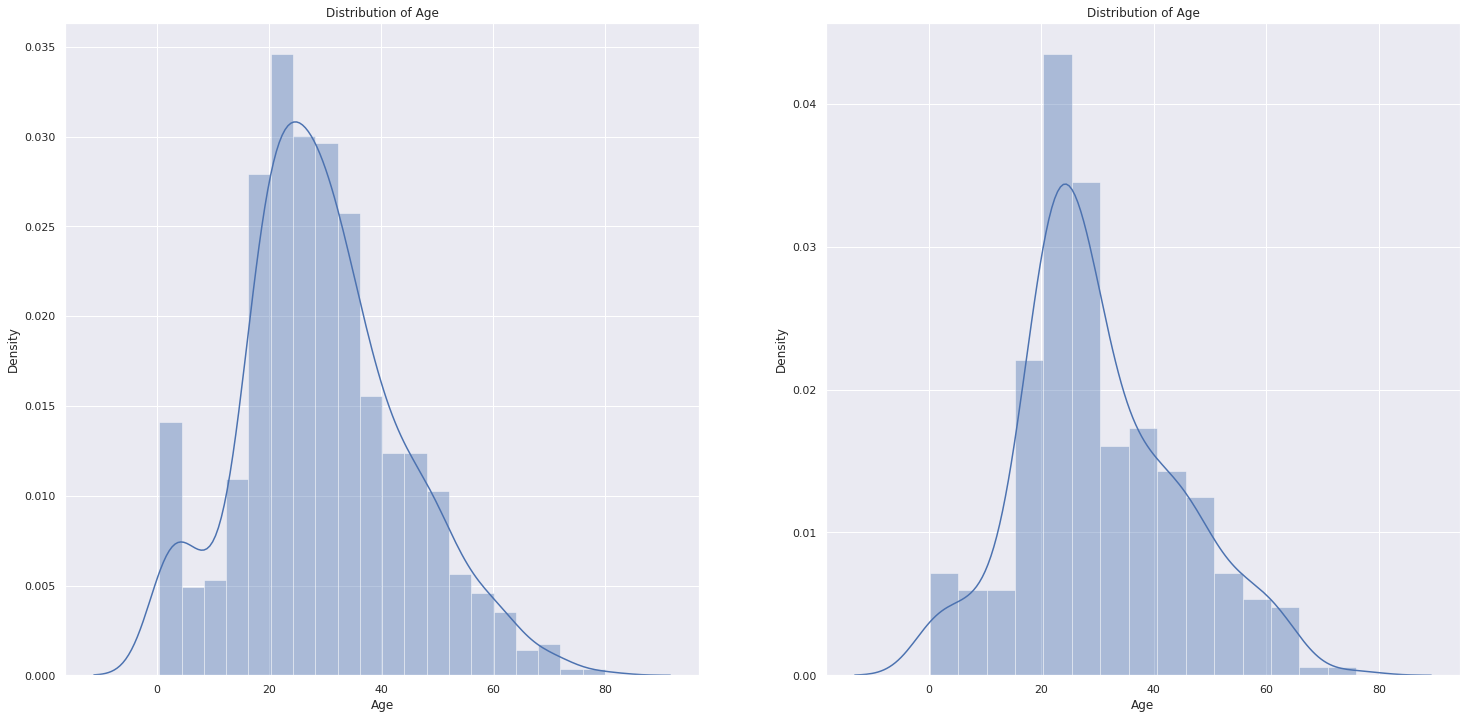

In [ ]:

plt.subplot(1,2,1)
sns.distplot(train['Age'])
plt.title("Distribution of Age")
plt.subplot(1,2,2)
sns.distplot(test['Age'])
plt.title("Distribution of Age")

In [ ]:
#change types
train["Age"] = train.Age.astype(float)
train["Fare"] = train.Age.astype(float)

In [ ]:
#replace null values with mean
train['Age'].replace([np.nan], train['Age'].mean(), inplace=True)
train['Fare'].replace([np.nan], train['Fare'].mean(), inplace=True)

##1.6 Duplicated Values

In [ ]:
#We check if we have any duplicates
train.duplicated().sum()

0

In [ ]:
test.duplicated().sum()

0

## 1.7 Descriptive Statistical

In [ ]:
# divide into numerical and categorical columns, as they will be treated with different techniques.
num_attributes = train.select_dtypes( include=['float64'] )
cat_attributes = train.select_dtypes( exclude=['float64', 'datetime64[ns]'] )

In [ ]:
num_attributes.sample()

,Age,Fare
45,29.642093,29.642093


In [ ]:
cat_attributes.sample()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,1,0,113776,S


### 1.7.1 Numerical Attributes

In [ ]:

# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.nanmedian ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T
d7 = pd.DataFrame( num_attributes.apply( lambda x: x.var() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6, d7] ).T.reset_index()
m.columns = ( ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis', 'Variance'])

In [ ]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis,Variance
0,Age,0.42,80.0,79.58,29.642093,29.642093,12.96105,0.434355,0.980555,168.178006
1,Fare,0.42,80.0,79.58,29.642093,29.642093,12.96105,0.434355,0.980555,168.178006


Mean and mode are quite similar meaning we have a gaussiann distribution
We have a high variance we will have to look for outliers in our data

### 1.7.2 Categorical Attributes

In [ ]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
SibSp            7
Parch            7
Ticket         680
Embarked         3
dtype: int64

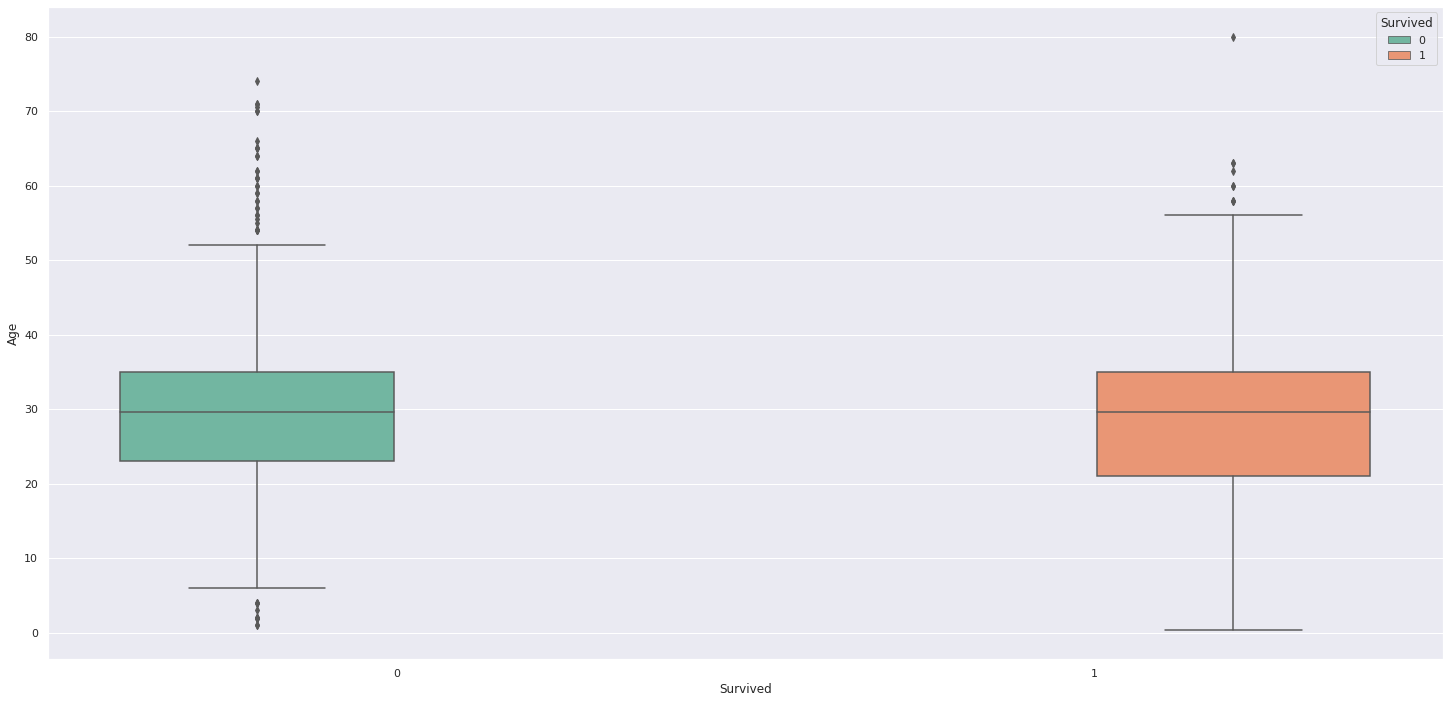

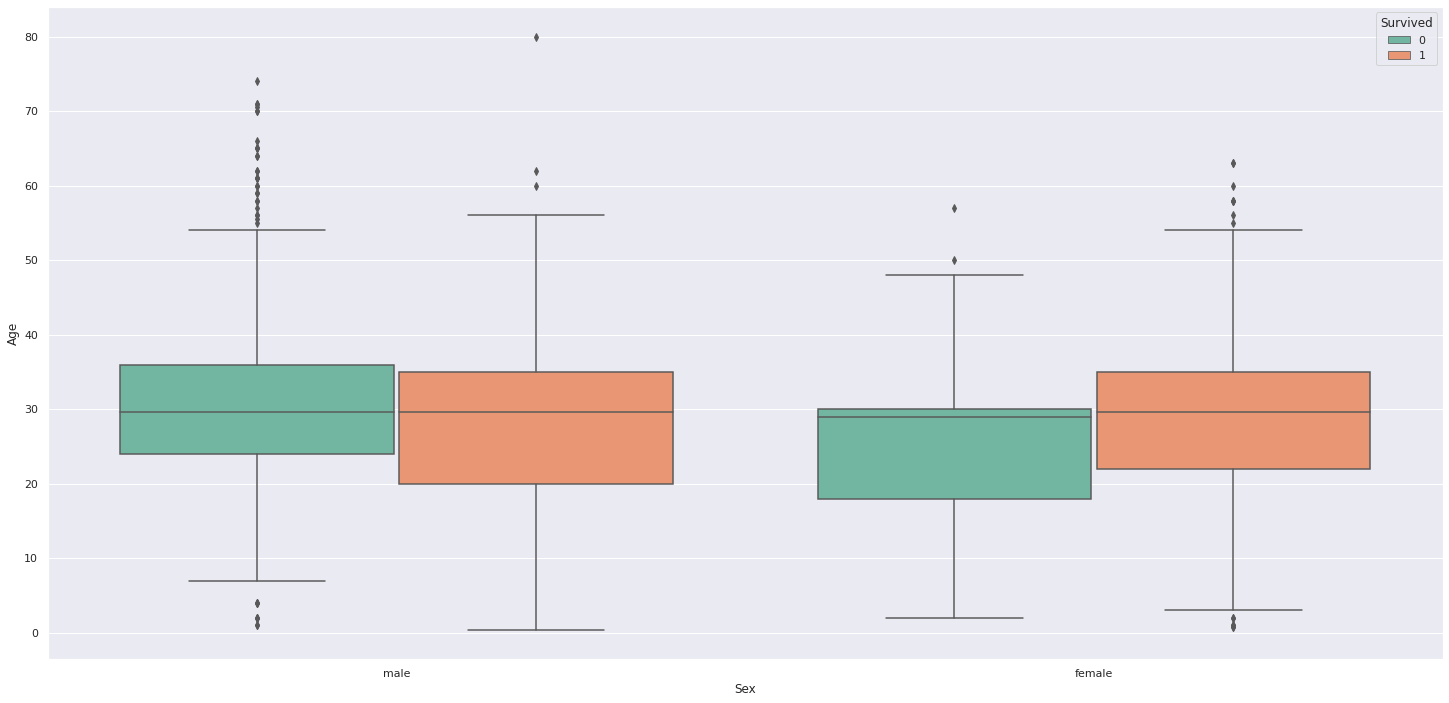

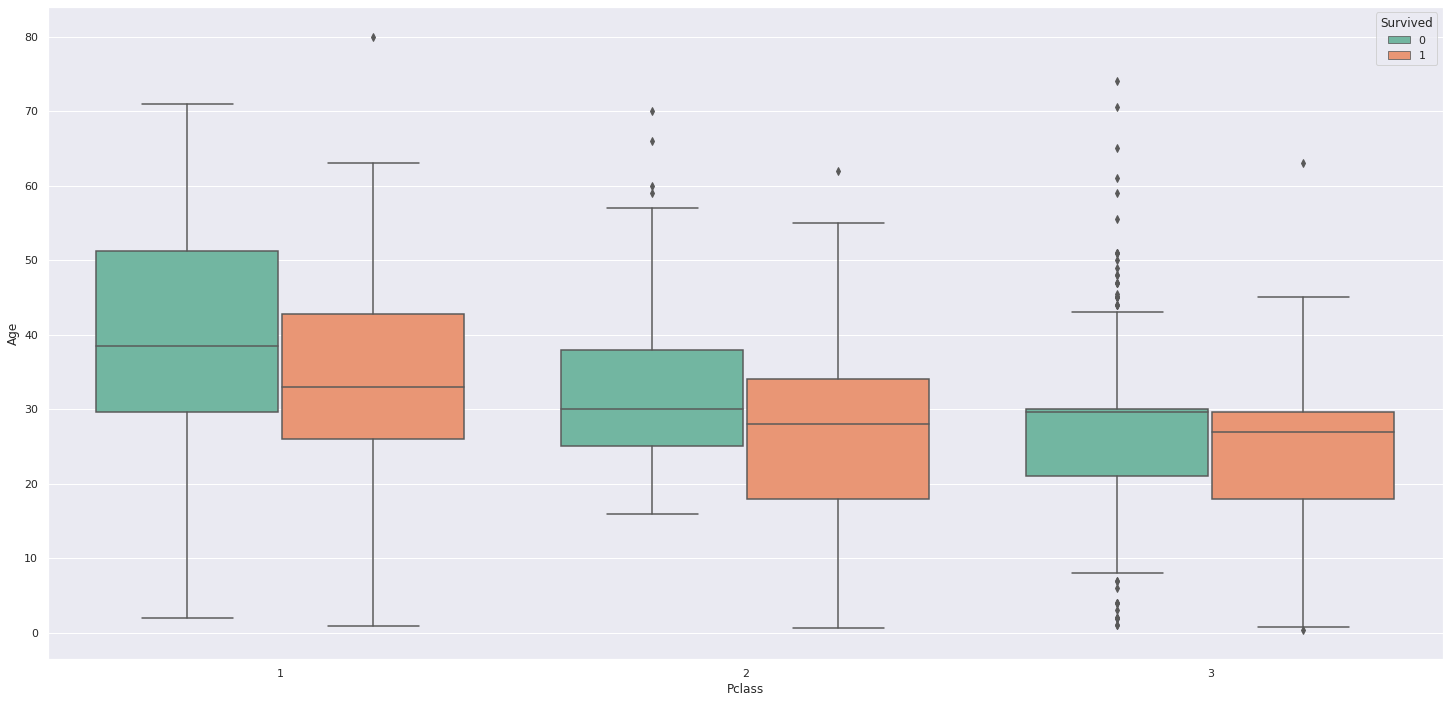

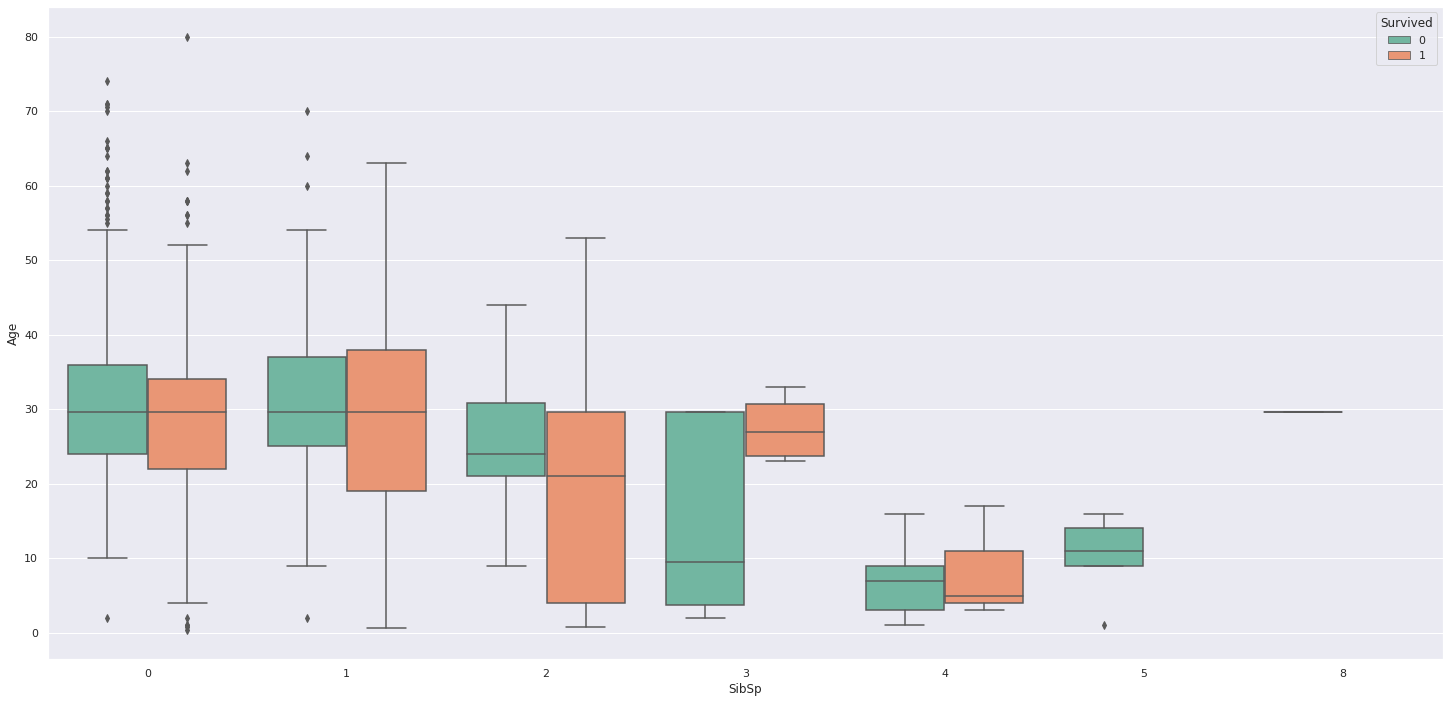

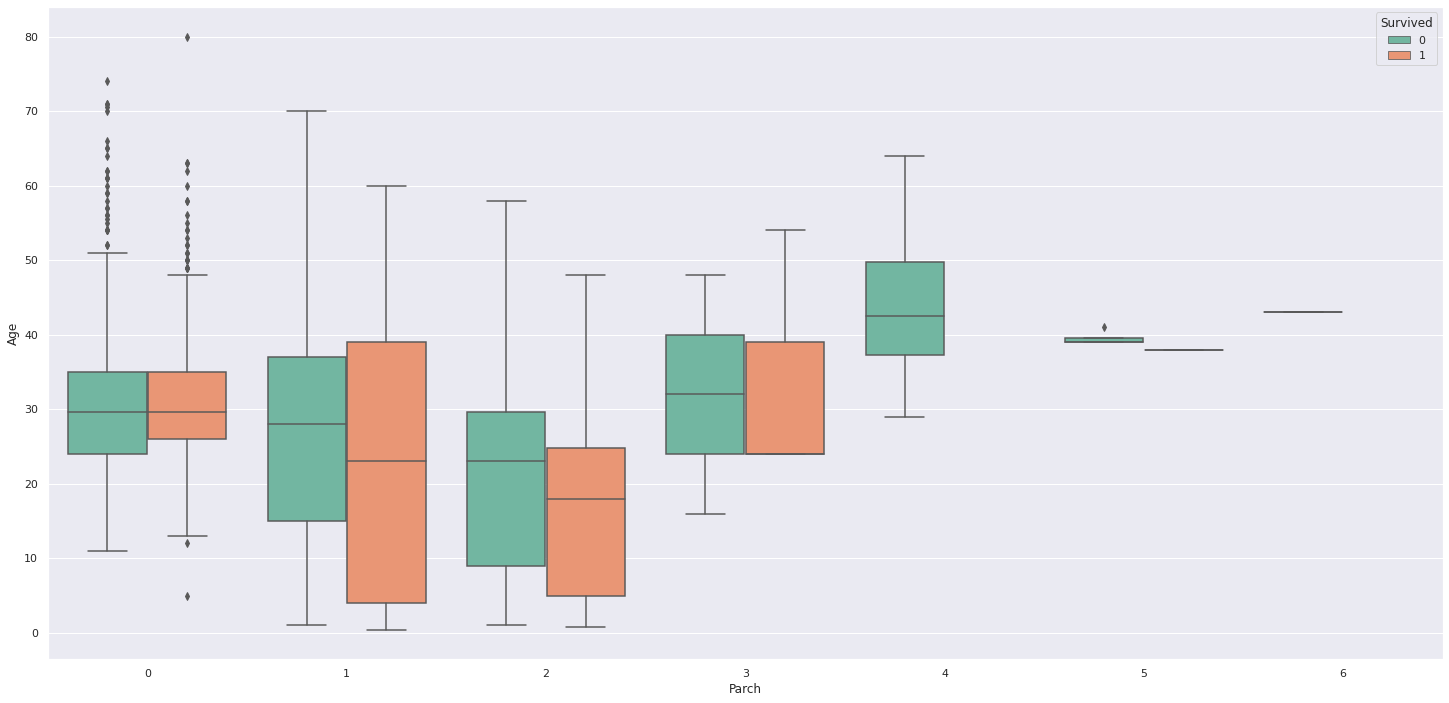

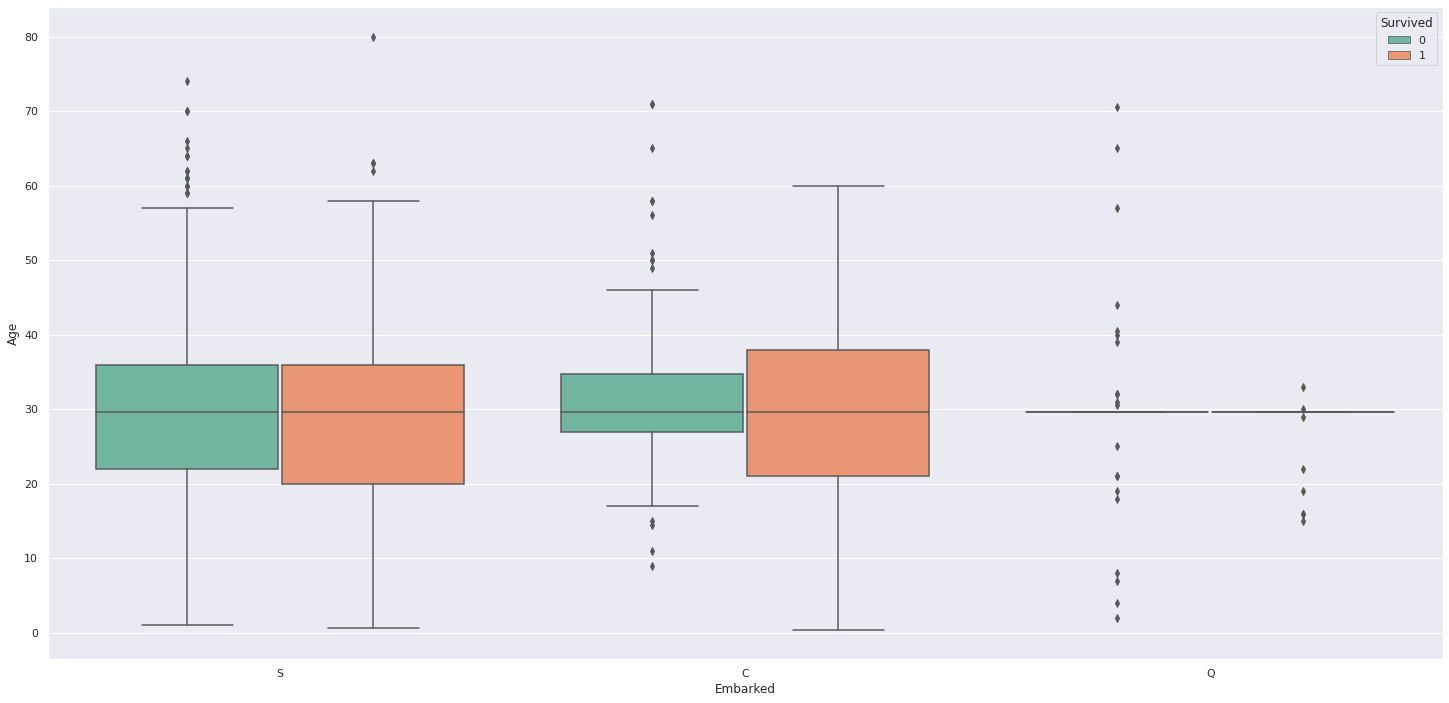

In [ ]:
# precense of outliers in our data
cat = ['Survived', 'Sex','Pclass', 'SibSp', 'Parch','Embarked' ]

for c in cat:
  sns.boxplot(x=train[c], y="Age", hue="Survived",
                 data=train, palette="Set2")
  plt.show()

#2.0 EXPLORATORY DATA ANALYSIS

In [ ]:
df1 = train.copy()

## 2.1 Univariate Analysis

### 2.1.1 Response Variable

In [ ]:
surv = df1[['PassengerId', "Survived"]]

In [ ]:
surv['Survived'] = surv['Survived'].replace({0:"Not Survived", 1: 'Survived'})

In [ ]:
surv_total = surv.groupby(surv['Survived']).count()
surv_percent = surv_total / surv_total.sum() *100

In [ ]:
surv_total

,PassengerId
Survived,
Not Survived,549
Survived,340


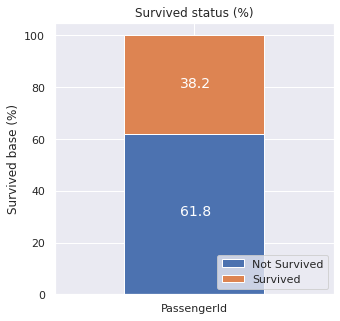

In [ ]:
plot_stacked_bars(surv_percent.transpose(),"Survived status (%)", (5, 5), legend_="lower right")

Around 340 people survived in the ship amounting to 38.2%

### 2.1.2 Numerical Attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe50719a490>,
      dtype=object)

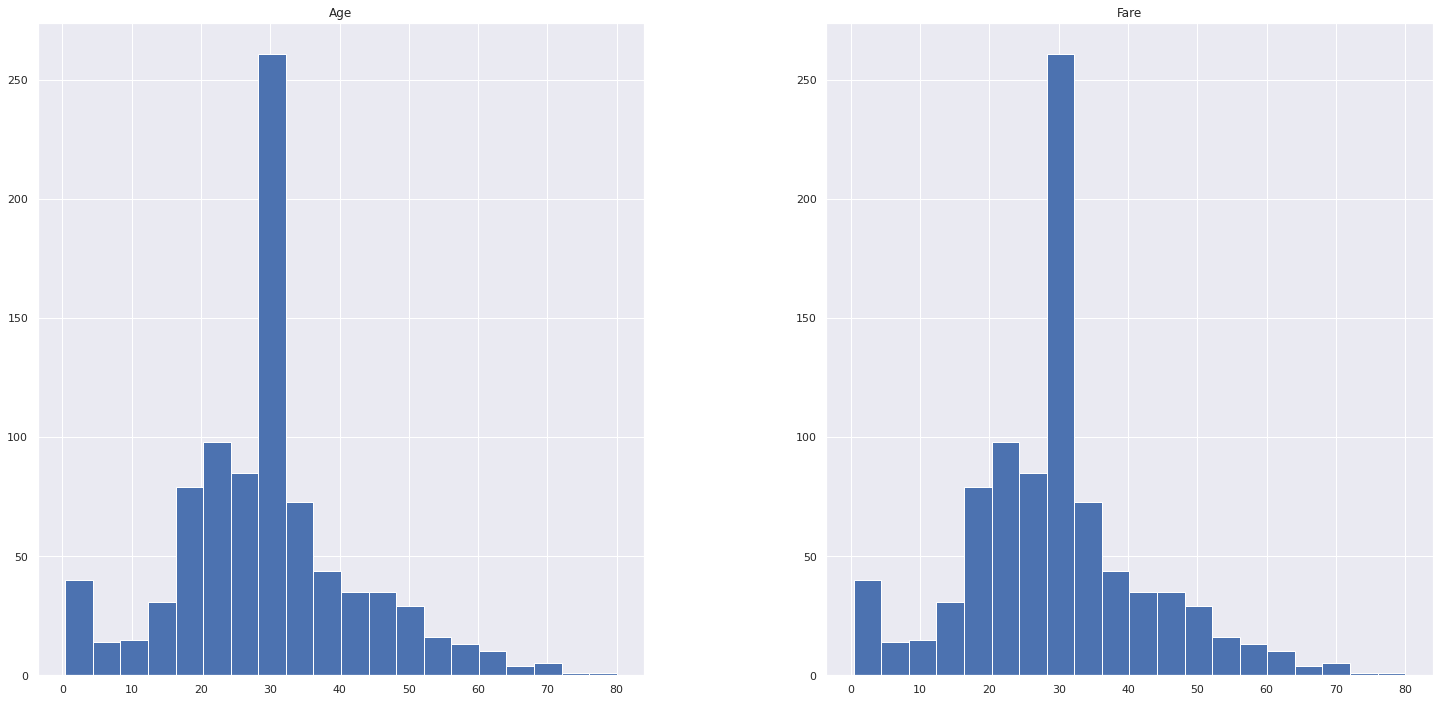

In [ ]:
num_attributes.hist(bins=20)

### 2.1.2 Categorical Attributes

In [ ]:
cat_attributes.sample()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked
396,397,0,3,"Olsson, Miss. Elina",female,0,0,350407,S


In [ ]:
df1.Survived = df1.Survived.astype("str")

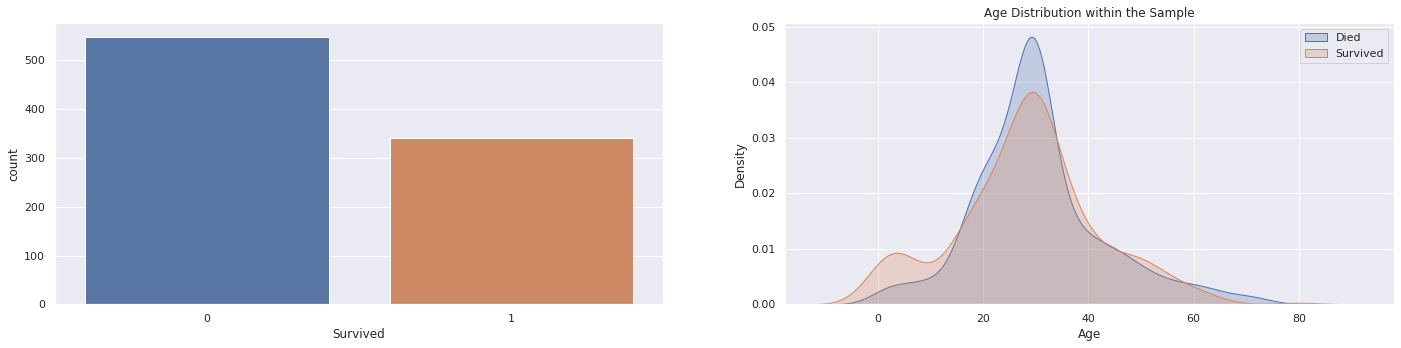

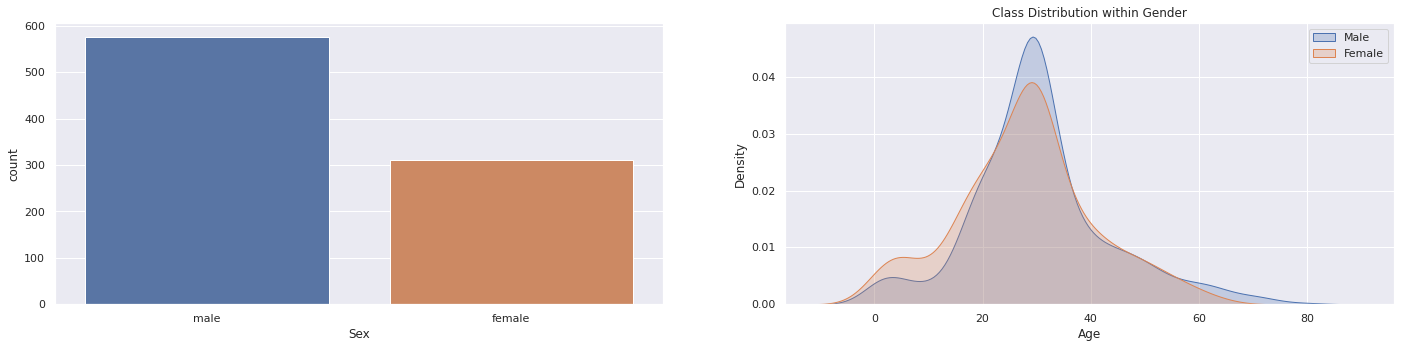

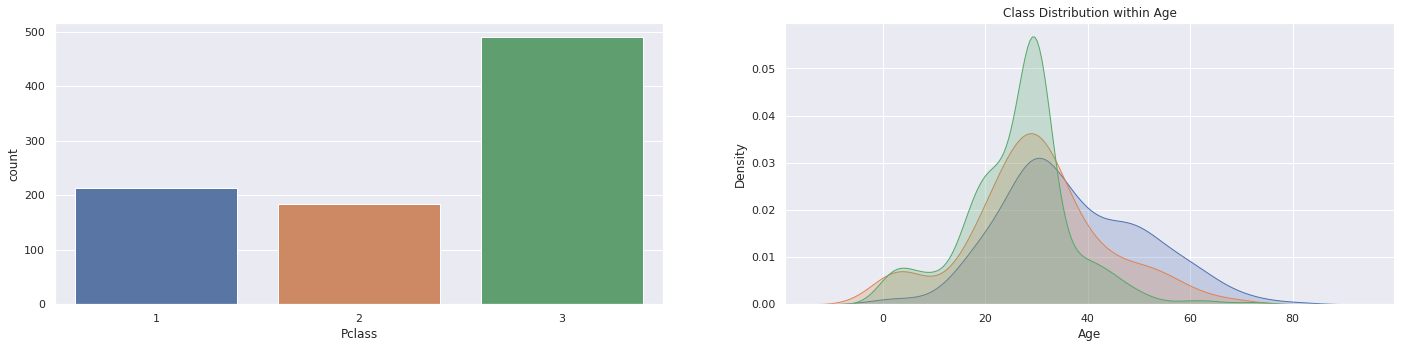

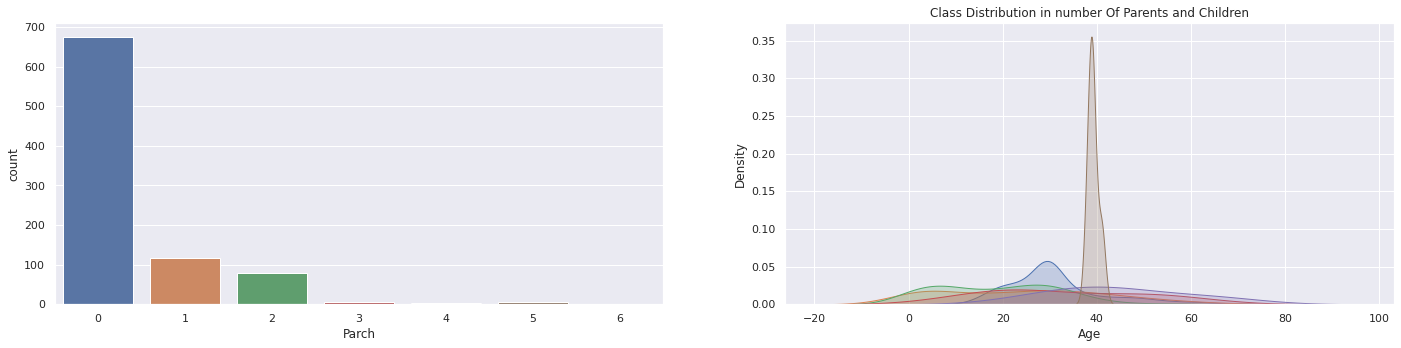

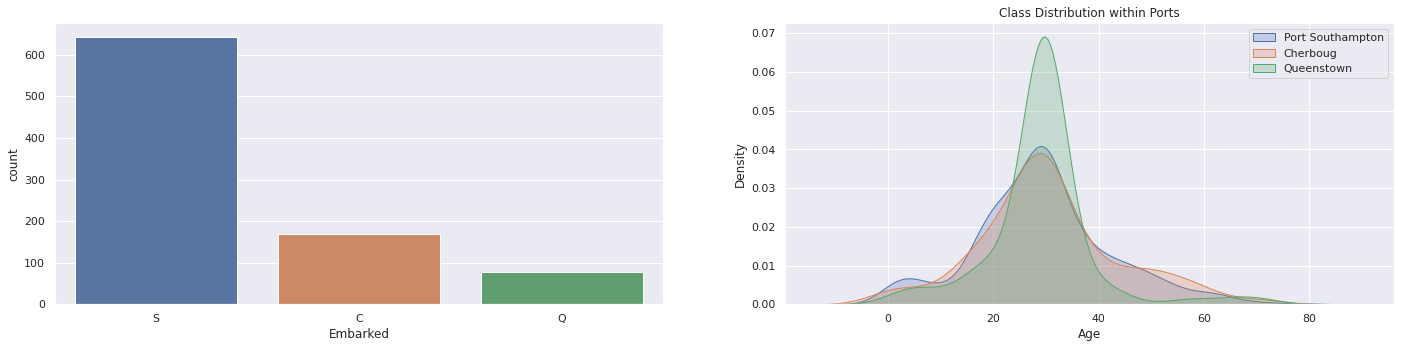

In [ ]:
plt.figure(figsize(24,30))
plt.subplot( 5, 2, 1)
sns.countplot( df1['Survived'] )

plt.subplot( 5, 2, 2)
sns.kdeplot( df1[df1['Survived'] == '0']['Age'], label='Died', shade=True )
sns.kdeplot( df1[df1['Survived'] == '1']['Age'], label='Survived', shade=True )
plt.legend()
plt.title("Age Distribution within the Sample")
plt.show()

plt.subplot( 5, 2, 3)
sns.countplot( df1['Sex'] )

plt.subplot( 5, 2, 4)
sns.kdeplot( df1[df1['Sex'] == 'male']['Age'], label='Male', shade=True )
sns.kdeplot( df1[df1['Sex'] == 'female']['Age'], label='Female', shade=True )
plt.legend()
plt.title("Class Distribution within Gender")
plt.show()

plt.subplot( 5, 2, 5)
sns.countplot( df1['Pclass'] )

plt.subplot( 5, 2, 6)
sns.kdeplot( df1[df1['Pclass'] == 1]['Age'], label='First Class', shade=True )
sns.kdeplot( df1[df1['Pclass'] == 2]['Age'], label='Second Class', shade=True )
sns.kdeplot( df1[df1['Pclass'] == 3]['Age'], label='Third Class', shade=True )
plt.title("Class Distribution within Age")
plt.show()


plt.subplot( 5, 2, 7)
sns.countplot( df1['Parch'] )

plt.subplot( 5, 2, 8)
sns.kdeplot( df1[df1['Parch'] == 0]['Age'], label='0', shade=True )
sns.kdeplot( df1[df1['Parch'] == 1]['Age'], label='1', shade=True )
sns.kdeplot( df1[df1['Parch'] == 2]['Age'], label='2', shade=True )
sns.kdeplot( df1[df1['Parch'] == 3]['Age'], label='3', shade=True )
sns.kdeplot( df1[df1['Parch'] == 4]['Age'], label='4', shade=True )
sns.kdeplot( df1[df1['Parch'] == 5]['Age'], label='5', shade=True )
sns.kdeplot( df1[df1['Parch'] == 6]['Age'], label='6', shade=True )
plt.title("Class Distribution in number Of Parents and Children")
plt.show()

plt.subplot( 5, 2, 9)
sns.countplot( df1['Embarked'] )

plt.subplot( 5, 2, 10)
sns.kdeplot( df1[df1['Embarked'] == 'S']['Age'], label='Port Southampton', shade=True )
sns.kdeplot( df1[df1['Embarked'] == 'C']['Age'], label='Cherboug', shade=True )
sns.kdeplot( df1[df1['Embarked'] == 'Q']['Age'], label='Queenstown', shade=True )
plt.legend()
plt.title("Class Distribution within Ports")
plt.show()


## 2.2 Bivariate Analysis

In [ ]:
sex = df1[['PassengerId', 'Sex', 'Survived']]
sex['Survived'] = sex['Survived'].replace({0:"Not Survived", 1: 'Survived'})
sex = sex.groupby([sex['Sex'], sex['Survived']])['PassengerId'].count().unstack(level=1).fillna(0)
sex_surv = sex.div(sex.sum(axis=1), axis=0) * 100

In [ ]:
sex

Survived,0,1
Sex,,
female,81,231
male,468,109


In [ ]:
sex_surv.head()

Survived,0,1
Sex,,
female,25.961538,74.038462
male,81.109185,18.890815


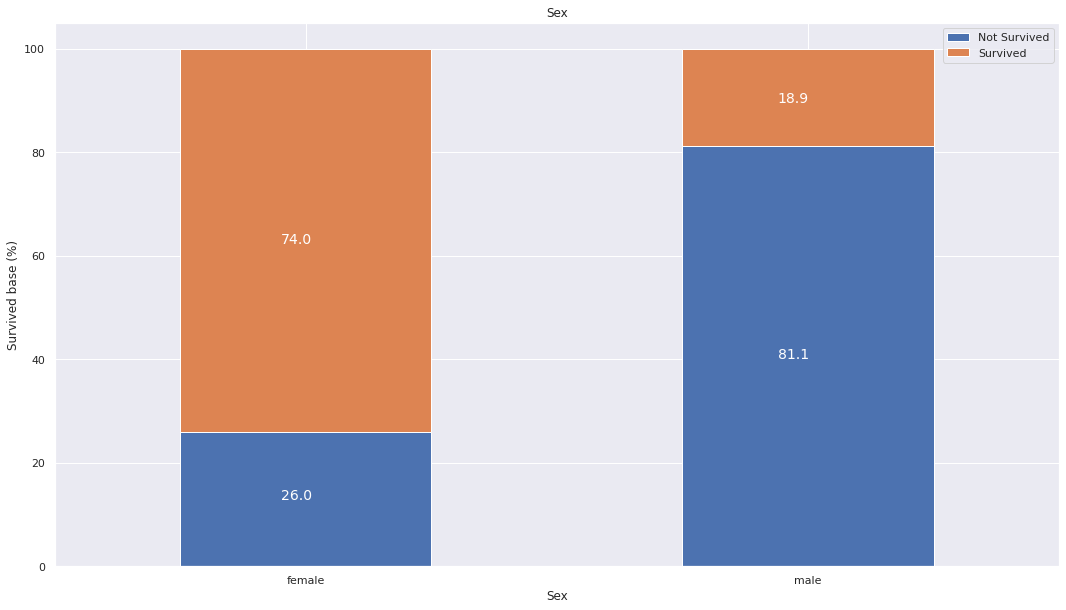

In [ ]:
plot_stacked_bars(sex_surv, 'Sex', rot_= 0)


A lot of men died as compared to women. Majority of women survived

In [ ]:
pclass = df1[['PassengerId', 'Pclass', 'Survived']]
pclass['Survived'] = pclass['Survived'].replace({0:"Not Survived", 1: 'Survived'})
pclass = pclass.groupby([pclass['Pclass'], pclass['Survived']])['PassengerId'].count().unstack(level=1).fillna(0)
pclass_surv = pclass.div(pclass.sum(axis=1), axis=0) * 100

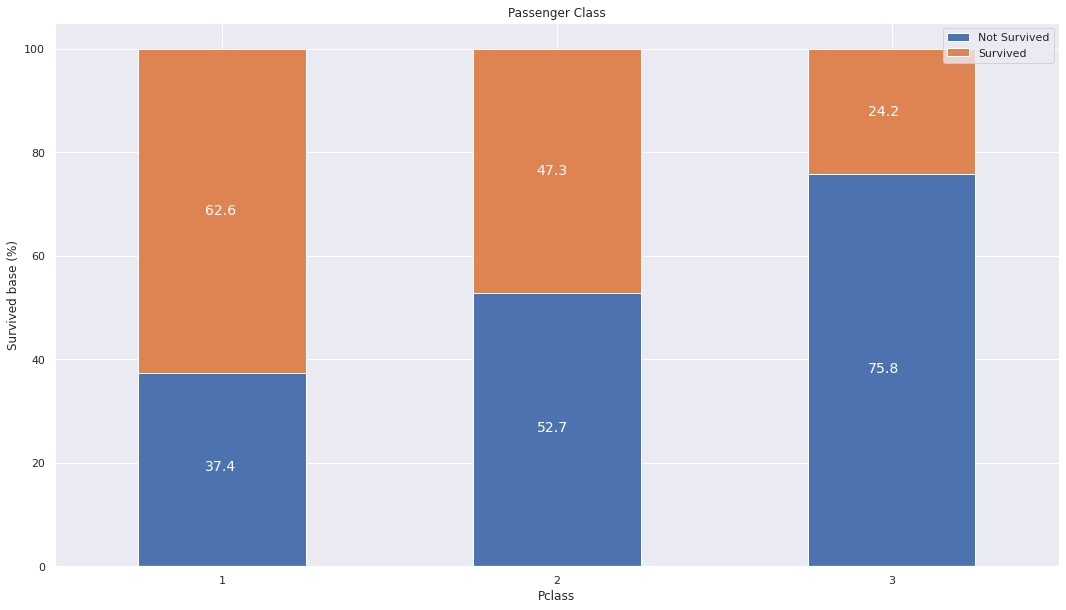

In [ ]:
plot_stacked_bars(pclass_surv, 'Passenger Class', rot_= 0)

A lot of people in first class survived Third class had the most fatalities

In [ ]:
port = df1[['PassengerId', 'Embarked', 'Survived']]
port['Survived'] = port['Survived'].replace({0:"Not Survived", 1: 'Survived'})
port = port.groupby([port['Embarked'], port['Survived']])['PassengerId'].count().unstack(level=1).fillna(0)
port_surv = port.div(port.sum(axis=1), axis=0) * 100

In [ ]:
port_surv

Survived,0,1
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.304348,33.695652


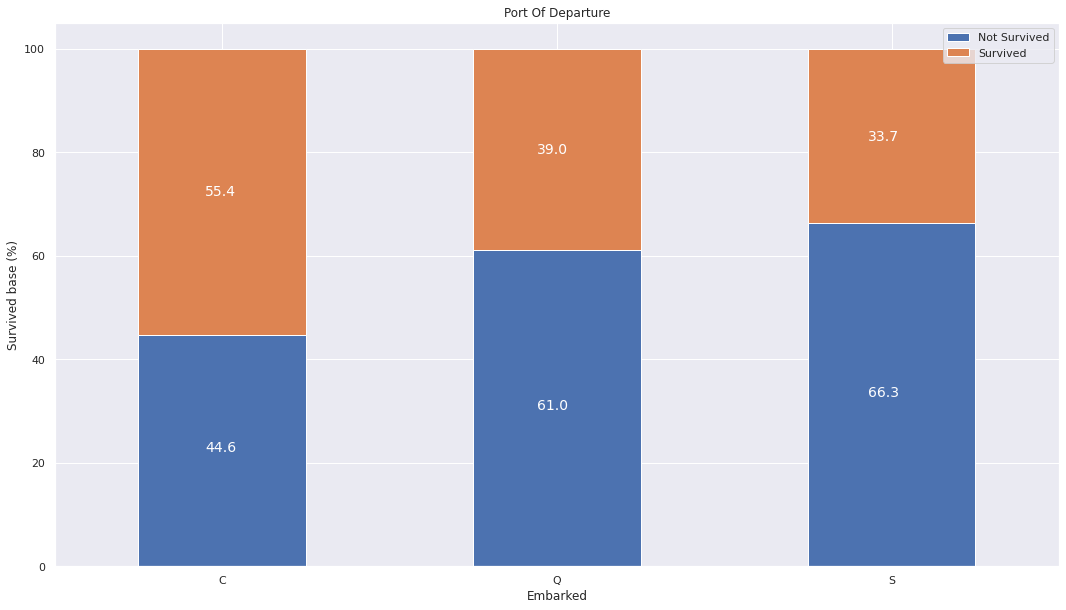

In [ ]:
plot_stacked_bars(port_surv, 'Port Of Departure', rot_= 0)

In [ ]:
parch = df1[['PassengerId', 'Parch', 'Survived']]
parch['Survived'] = parch['Survived'].replace({0:"Not Survived", 1: 'Survived'})
parch = parch.groupby([parch['Parch'], parch['Survived']])['PassengerId'].count().head().unstack(level=1).fillna(0)
parch_surv = parch.div(port.sum(axis=1), axis=0) * 100

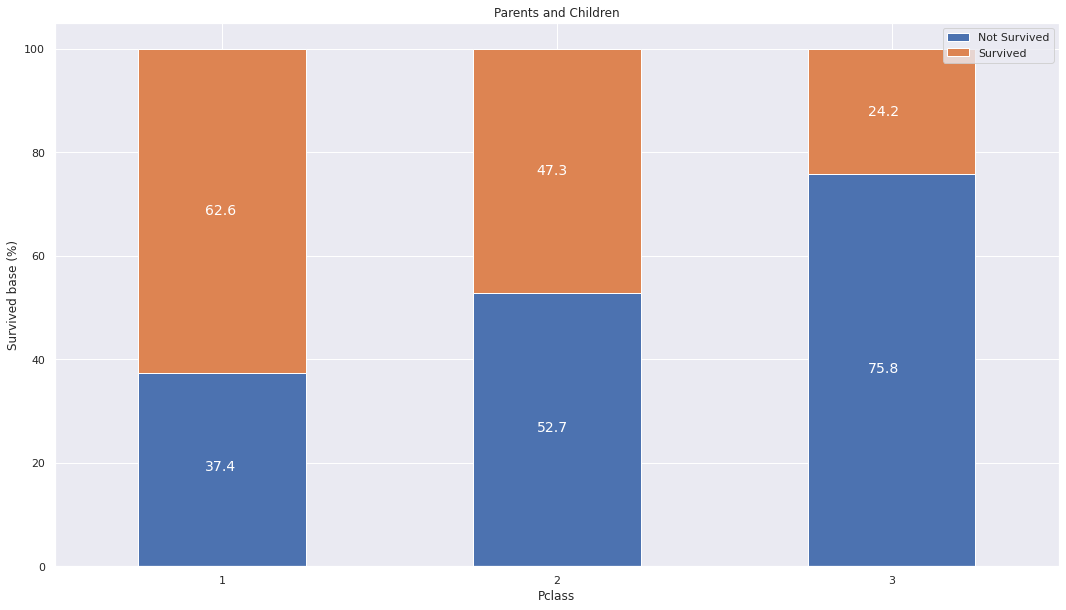

In [ ]:
plot_stacked_bars(pclass_surv, 'Parents and Children', rot_= 0)

In [ ]:
female_highclass = df1[["Sex", "Pclass", "PassengerId", "Survived"]]
female_highclass.sample()

,Sex,Pclass,PassengerId,Survived
229,female,3,230,0


In [ ]:
female_highclass['Survived'] = female_highclass['Survived'].replace({0:"Not Survived", 1: 'Survived'})

In [ ]:
female_highclass = female_highclass[( female_highclass['Sex'] == 'female') & (female_highclass['Pclass'] != 3 )][['PassengerId', 'Survived']]

In [ ]:
fhc = female_highclass.groupby(female_highclass['Survived']).count()

In [ ]:
fhc

,PassengerId
Survived,
0,9
1,159


In [ ]:
fhc_percent =  fhc /fhc.sum() *100

In [ ]:
male_highclass = df1[["Sex", "Pclass", "PassengerId", "Survived"]]
male_highclass.sample()

,Sex,Pclass,PassengerId,Survived
711,male,1,712,0


In [ ]:
female_highclass['Survived'] = female_highclass['Survived'].replace({0:"Not Survived", 1: 'Survived'})

In [ ]:
male_highclass = df1[( df1['Sex'] == 'male') & (df1['Pclass'] != 3 )][['PassengerId', 'Survived']]

In [ ]:
mhc = male_highclass.groupby(male_highclass['Survived']).count()

In [ ]:
mhc

,PassengerId
Survived,
0,168
1,62


In [ ]:
mhc_percent =  mhc /mhc.sum() *100

In [ ]:
female_lowclass = df1[["Sex", "Pclass", "PassengerId", "Survived"]]
female_lowclass.sample()

,Sex,Pclass,PassengerId,Survived
810,male,3,811,0


In [ ]:
female_lowclass['Survived'] = female_lowclass['Survived'].replace({0:"Not Survived", 1: 'Survived'})

In [ ]:
female_lowclass = female_lowclass[( female_lowclass['Sex'] == 'female') & (female_lowclass['Pclass'] == 3)][['PassengerId', 'Survived']]

In [ ]:
flc = female_lowclass.groupby(female_lowclass['Survived']).count()

In [ ]:
flc

,PassengerId
Survived,
0,72
1,72


In [ ]:
flc_percent =  flc /flc.sum() *100
flc_percent

,PassengerId
Survived,
0,50.0
1,50.0


In [ ]:
male_lowclass = df1[["Sex", "Pclass", "PassengerId", "Survived"]]
male_lowclass.sample()

,Sex,Pclass,PassengerId,Survived
441,male,3,442,0


In [ ]:
male_lowclass['Survived'] = male_lowclass['Survived'].replace({0:"Not Survived", 1: 'Survived'})

In [ ]:
male_lowclass = male_lowclass[( male_lowclass['Sex'] == 'male') & (male_lowclass['Pclass'] == 3)][['PassengerId', 'Survived']]

In [ ]:
mlc = male_lowclass.groupby(male_lowclass['Survived']).count()

In [ ]:
mlc

,PassengerId
Survived,
0,300
1,47


In [ ]:
mlc_percent =  mlc /mlc.sum() *100
mlc_percent

,PassengerId
Survived,
0,86.455331
1,13.544669


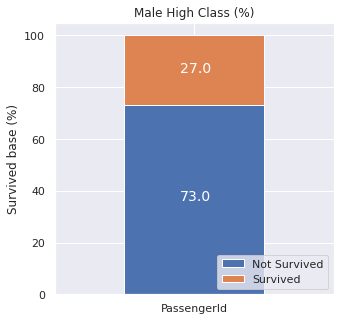

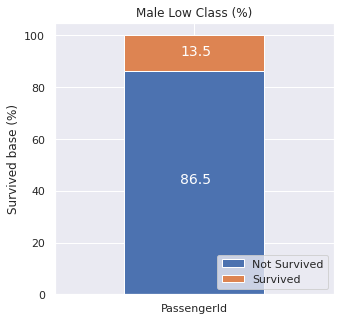

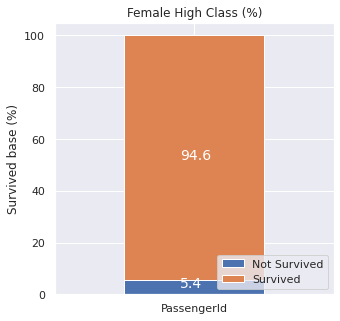

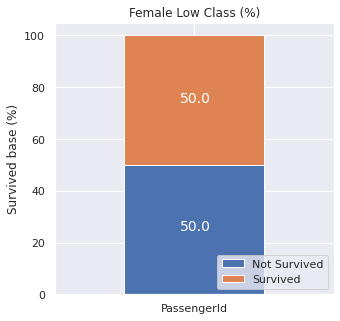

In [ ]:

plot_stacked_bars(mhc_percent.transpose(),"Male High Class (%)", (5, 5), legend_="lower right")
plot_stacked_bars(mlc_percent.transpose(),"Male Low Class (%)", (5, 5), legend_="lower right")
plot_stacked_bars(fhc_percent.transpose(),"Female High Class (%)", (5, 5), legend_="lower right")
plot_stacked_bars(flc_percent.transpose(),"Female Low Class (%)", (5, 5), legend_="lower right")

#3.0 Machine Learning Modelling

## 3.1 K Nearest Neighbours



> KNN is a supervised and pattern classification algorithm which helps us find which class the new input belongs to when k nearest neighbours are choosen and distance is calculated between them. it attempts to estimate the conditional distribution of Y given X and classify a given observation(test value) to the class with highest estimated probability


> It first Identifies the k points in the training data that are closest to the test value and calculates the distance between all those categories.






In [ ]:
df2 = df1.copy()

In [ ]:
df2.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
420,421,0,3,"Gheorgheff, Mr. Stanio",male,29.642093,0,0,349254,29.642093,C
877,878,0,3,"Petroff, Mr. Nedelio",male,19.000000,0,0,349212,19.000000,S


### 3.1.1 Separate features and predictors

In [ ]:
X = df2.drop(columns=['Survived', "PassengerId", "Name", "Sex", "Embarked", "Ticket"]).values
y = df2.iloc[:, 1].values
y = y.astype('float64')

### 3.1.2 Separate Training data and Test Data

In [ ]:
# Train Test Split

# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data, We will start by separating by ration 80:20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### 3.1.3 Scaling our Data

In [ ]:
# Feature Scaling

# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 3.1.4 Finding an Optimal Value of K

In [ ]:
## Initialize an array that stores the error rates.
error_rates = []

for a in range(1, 40):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_preds = knn.predict(X_test)
    error_rates.append(np.mean(y_test - y_preds ))
    
plt.figure(figsize=(10, 7))
plt.plot(range(1,40),error_rates,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

NameError: ignored

### 3.1.5 Training and Predictions

In [ ]:
# Training and Predictions

# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

In [ ]:
# The final step is to make predictions on our test data

y_pred = classifier.predict(X_test)

###3.1.6 Visualization

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
plt.figure(figsize(5,5))
markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)
  

### 3.1.7 Evaluating Our Algorithm

In [ ]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(classifier, X_test, y_test) 

### 3.1.8 Optimizing KNN using PCA

**Principal Component Analysis Analysis (PCA)** PCA helps us to identify the patterns in the dataset based on the correlation between them. Or simply, it is a technique for feature extraction that combines our input variables in such a way that we can drop the least important ones while retaining the important information in the dataset. PCA finds the direction of the maximum variance and projects the data into lower dimensions. The principal components of the new subspace can be interpreted as the direction of maximum variance given the constraint that the new feature axes are orthogonal to each other.

In [ ]:
X = df2.drop(columns=['Survived', "PassengerId", "Name", "Sex", "Embarked", "Ticket"]).values
y = df2.iloc[:, 1].values

In [ ]:
# Train Test Split

# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [ ]:
# Feature Scaling

# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
df2.sample()

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
print(X_train_pca.shape)


In [ ]:
pca.explained_variance_ratio_

In [ ]:
colors = ['r','b','g']
markers = ['s','x','o']
for l,c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l,0],
                X_train_pca[y_train==l,1],
                c=c, label=l, marker=m)
plt.title("Compressed Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
pca1 = PCA(n_components=0.8)
X_train_pca = pca1.fit_transform(X_train)
X_test_pca = pca1.transform(X_test)

In [ ]:
# Training and Predictions

# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train_pca, y_train)

In [ ]:
# The final step is to make predictions on our test data

y_pred = classifier.predict(X_test_pca)

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
plt.figure(figsize(5,5))
markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)
  

In [ ]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(classifier, X_test_pca, y_test) 